In [1]:
#importing library 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [2]:
#create the dataframe with zomato data 
df = pd.read_csv("zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [6]:
#cheaking for null values 
df.isna().sum()
#here is nothing null values

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [4]:
#convert the data type of rate and remove /5 in all rows 
def handlerate(value):
    value=str(value).split("/")
    value=value[0];
    return float (value)

df['rate'] = df['rate'].apply(handlerate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [12]:
#types of restaurant ---use unique function to find list and use nfunction to find numbers
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

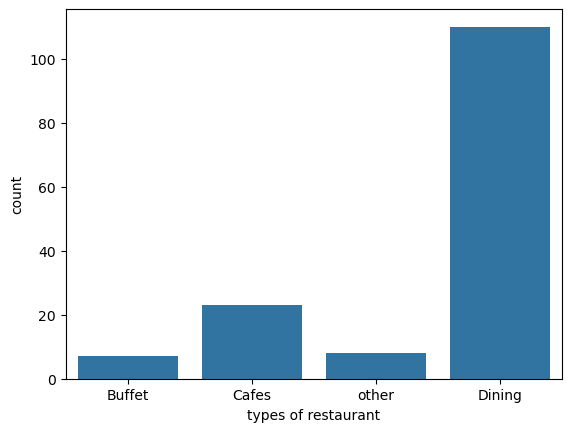

In [25]:
#Que] what type of restaurant do the majority of customers order from--dinning
sns.countplot(x="listed_in(type)",data=df)
plt.xlabel("types of restaurant")
plt.show()

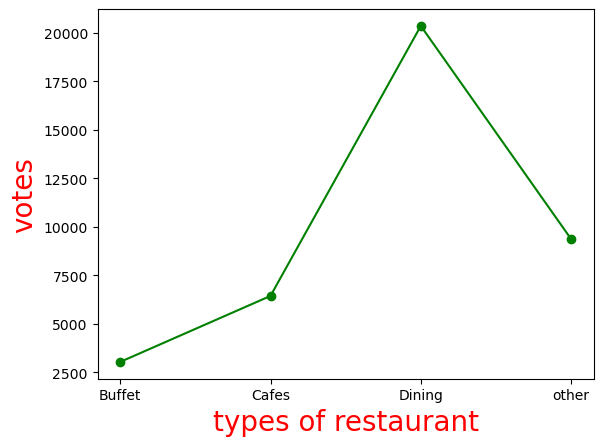

In [28]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("types of restaurant",c='r',size=20)
plt.ylabel("votes",c='r',size=20)
plt.show()

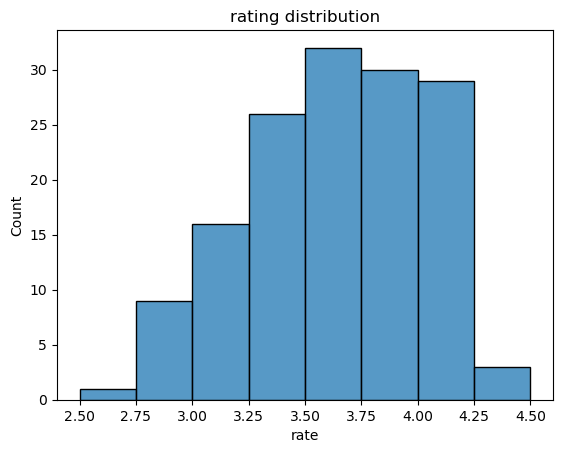

In [9]:
sns.histplot(df["rate"],bins=[2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50])
plt.title("rating distribution")
plt.show()

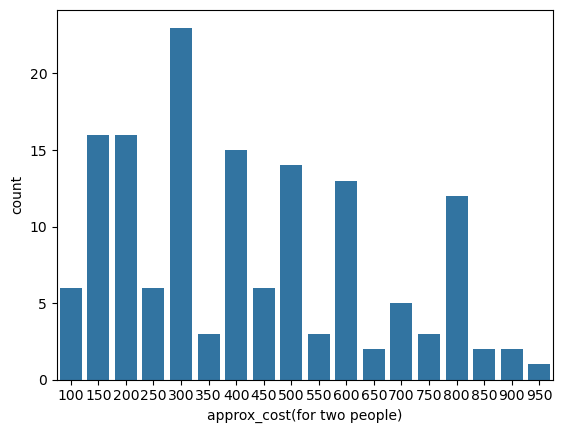

In [13]:
#avg order spending by couple 

sns.countplot(x="approx_cost(for two people)",data=df)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_9724\3567224450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="online_order",y="rate",data=df,palette=["lightblue", "lightgreen"],width=0.5)


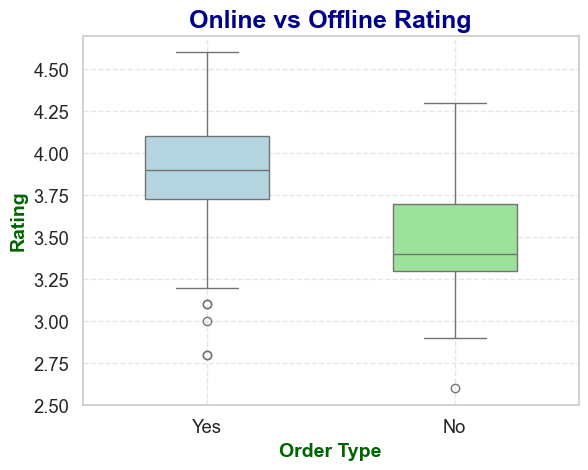

In [34]:
#which mode prefer most
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)
sns.boxplot(x="online_order",y="rate",data=df,palette=["lightblue", "lightgreen"],width=0.5)
plt.title("Online vs Offline Rating", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Order Type", fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel("Rating", fontsize=14, fontweight='bold', color='darkgreen')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

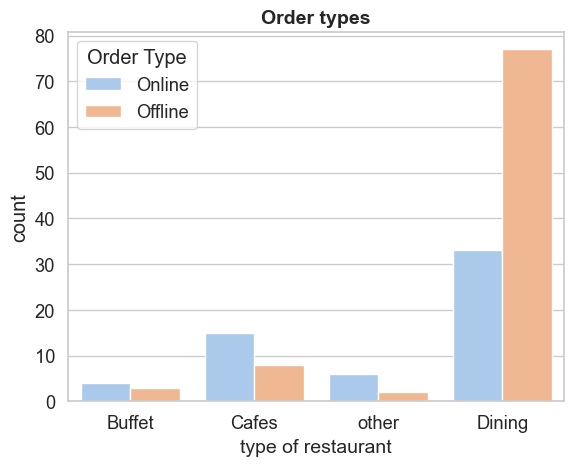

In [43]:
sns.countplot(x="listed_in(type)",hue="online_order",data=df)
plt.legend(title="Order Type", labels=["Online", "Offline"])
plt.xlabel("type of restaurant",fontsize=14)
plt.title("Order types",fontsize=14,fontweight="bold")
plt.show()